In [235]:
import csv
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import activations

RANDOM_SEED = 42

# 各パス指定

In [236]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_byAE.keras'

# 学習データ読み込み

In [237]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
X_dataset =  X_dataset[4450:6020]

In [238]:
X_train, X_test = train_test_split(X_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [239]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(20, activation=activations.relu),
    tf.keras.layers.Dense(21 * 2, activation=activations.sigmoid),
])

In [240]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 42)             │           882 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742 (6.80 KB)

 Trainable params: 1,742 (6.80 KB)

 Non-trainable params: 0 (0.00 B)

In [241]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [242]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='MSE',
    metrics=['accuracy']
)

# モデル訓練

In [243]:
history = model.fit(
    X_train,
    X_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, X_test),
    callbacks=[cp_callback, es_callback]
)


Epoch 1/1000


 1/10 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.0000e+00 - loss: 0.8390
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier_byAE.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0000e+00 - loss: 0.8305 - val_accuracy: 0.0000e+00 - val_loss: 0.8151
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.8125 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier_byAE.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.8122 - val_accuracy: 0.0000e+00 - val_loss: 0.8007
Epoch 3/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0000e+00 - loss: 0.8003
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier_byAE.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.7969 - val_accuracy: 0.0000e+00 - val_loss: 0.7817
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.7758 
Epoch 4: saving model to model/ke

In [244]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, X_test, batch_size=128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8194 - loss: 0.2127


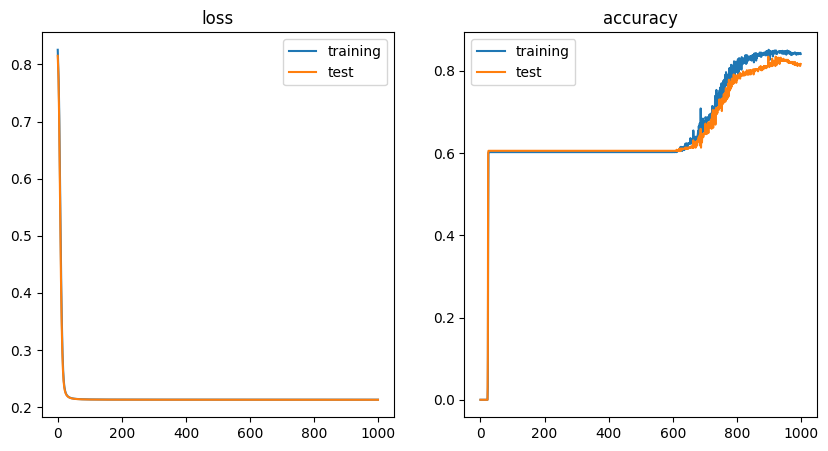

In [245]:
metrics = ['loss', 'accuracy']  # 使用する評価関数を指定

plt.figure(figsize=(10, 5))  # グラフを表示するスペースを用意

for i in range(len(metrics)):

    metric = metrics[i]

    plt.subplot(1, 2, i+1)  # figureを1×2のスペースに分け、i+1番目のスペースを使う
    plt.title(metric)  # グラフのタイトルを表示
    
    plt_train = history.history[metric]  # historyから訓練データの評価を取り出す
    plt_test = history.history['val_' + metric]  # historyからテストデータの評価を取り出す
    
    plt.plot(plt_train, label='training')  # 訓練データの評価をグラフにプロット
    plt.plot(plt_test, label='test')  # テストデータの評価をグラフにプロット
    plt.legend()  # ラベルの表示
    
plt.show()  # グラフの表示

# モデルのテスト
（パー以外の手、グーとポイントで異常値を出せるか検証）

In [246]:
import csv
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import activations

RANDOM_SEED = 42

In [247]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [248]:
test_dataset = 'model/keypoint_classifier/keypoint.csv'
test_X_dataset = np.loadtxt(test_dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

#パー(id=0)：AEで学習させたパターン
test_dataset_0 = test_X_dataset[0:1522]
test_dataset_1 = test_X_dataset[1522:3094]
test_dataset_2 = test_X_dataset[3094:4450]
test_dataset_3 = test_X_dataset[4450:6020]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━

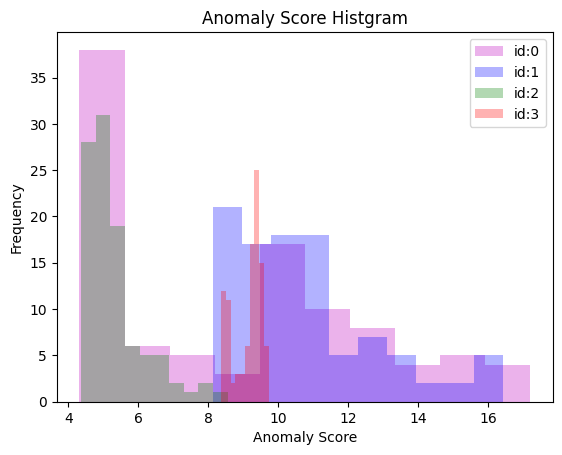

In [249]:
score_0 =[]
for i in range(100):
    pred = model.predict(np.array([test_dataset_0[i]]))
    diff = np.square(test_dataset_0[i] - pred[0])
    anomalous = np.sum(diff)
    score_0.append(anomalous)

score_1 =[]
for i in range(100):
    pred = model.predict(np.array([test_dataset_1[i]]))
    diff = np.square(test_dataset_1[i] - pred[0])
    anomalous = np.sum(diff)
    score_1.append(anomalous)

score_2 =[]
for i in range(100):
    pred = model.predict(np.array([test_dataset_2[i]]))
    diff = np.square(test_dataset_2[i] - pred[0])
    anomalous = np.sum(diff)
    score_2.append(anomalous)

score_3 =[]
for i in range(100):
    pred = model.predict(np.array([test_dataset_3[i]]))
    diff = np.square(test_dataset_3[i] - pred[0])
    anomalous = np.sum(diff)
    score_3.append(anomalous)


plt.title("Anomaly Score Histgram")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.hist(score_0, bins=10, alpha=0.3, histtype='stepfilled', color='m', label="id:0")
plt.hist(score_1, bins=10, alpha=0.3, histtype='stepfilled', color='b', label='id:1')
plt.hist(score_2, bins=10, alpha=0.3, histtype='stepfilled', color='g', label='id:2')
plt.hist(score_3, bins=10, alpha=0.3, histtype='stepfilled', color='r', label='id:3')
plt.legend(loc=1)
plt.show()
plt.close()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1

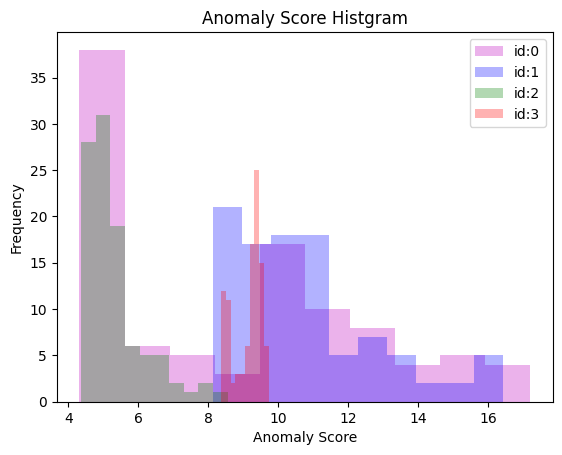

In [255]:
score_0 =[]
for i in range(100):
    pred = model.predict(np.array([test_dataset_0[i]]))
    diff = np.square(test_dataset_0[i] - pred[0])
    anomalous = np.sum(diff)
    score_0.append(anomalous)

score_1 =[]
for i in range(100):
    pred = model.predict(np.array([test_dataset_1[i]]))
    diff = np.square(test_dataset_1[i] - pred[0])
    anomalous = np.sum(diff)
    score_1.append(anomalous)

score_2 =[]
for i in range(100):
    pred = model.predict(np.array([test_dataset_2[i]]))
    diff = np.square(test_dataset_2[i] - pred[0])
    anomalous = np.sum(diff)
    score_2.append(anomalous)

score_3 =[]
for i in range(100):
    pred = model.predict(np.array([test_dataset_3[i]]))
    diff = np.square(test_dataset_3[i] - pred[0])
    anomalous = np.sum(diff)
    score_3.append(anomalous)


plt.title("Anomaly Score Histgram")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.hist(score_0, bins=10, alpha=0.3, histtype='stepfilled', color='m', label="id:0", rwidth = 0.8)
plt.hist(score_1, bins=10, alpha=0.3, histtype='stepfilled', color='b', label='id:1', rwidth = 0.8)
plt.hist(score_2, bins=10, alpha=0.3, histtype='stepfilled', color='g', label='id:2', rwidth = 0.8)
plt.hist(score_3, bins=10, alpha=0.3, histtype='stepfilled', color='r', label='id:3', rwidth = 0.8)
plt.legend(loc=1)
plt.show()
plt.close()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━

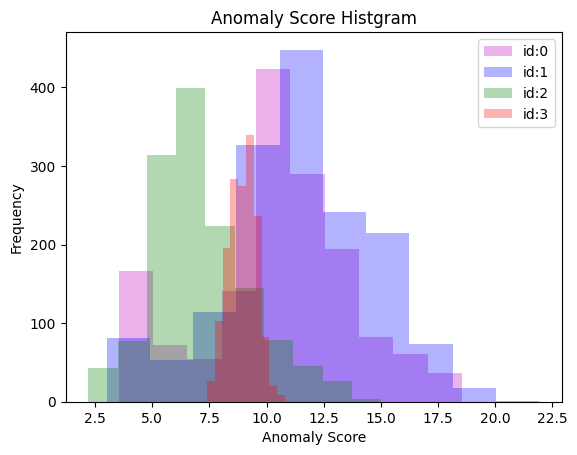

In [250]:
score_0 =[]
for i in range(len(test_dataset_0)):
    pred = model.predict(np.array([test_dataset_0[i]]))
    diff = np.square(test_dataset_0[i] - pred[0])
    anomalous = np.sum(diff)
    score_0.append(anomalous)

score_1 =[]
for i in range(len(test_dataset_1)):
    pred = model.predict(np.array([test_dataset_1[i]]))
    diff = np.square(test_dataset_1[i] - pred[0])
    anomalous = np.sum(diff)
    score_1.append(anomalous)

score_2 =[]
for i in range(len(test_dataset_2)):
    pred = model.predict(np.array([test_dataset_2[i]]))
    diff = np.square(test_dataset_2[i] - pred[0])
    anomalous = np.sum(diff)
    score_2.append(anomalous)

score_3 =[]
for i in range(len(test_dataset_3)):
    pred = model.predict(np.array([test_dataset_3[i]]))
    diff = np.square(test_dataset_3[i] - pred[0])
    anomalous = np.sum(diff)
    score_3.append(anomalous)


plt.title("Anomaly Score Histgram")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.hist(score_0, bins=10, alpha=0.3, histtype='stepfilled', color='m', label="id:0")
plt.hist(score_1, bins=10, alpha=0.3, histtype='stepfilled', color='b', label='id:1')
plt.hist(score_2, bins=10, alpha=0.3, histtype='stepfilled', color='g', label='id:2')
plt.hist(score_3, bins=10, alpha=0.3, histtype='stepfilled', color='r', label='id:3')
plt.legend(loc=1)
plt.show()
plt.close()

# Tensorflow-Lite用のモデルへ変換

In [251]:
import tensorflow as tf

In [252]:
# 推論専用のモデルとして保存
model_save_path = 'model/keypoint_classifier/keypoint_classifier_byAE.keras'
model = tf.keras.models.load_model(model_save_path)
model.save(model_save_path, include_optimizer=False)

In [253]:
# tensorflowのエラーが出るので、
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [254]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_byAE.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpzvkn91l0/assets


INFO:tensorflow:Assets written to: /tmp/tmpzvkn91l0/assets


Saved artifact at '/tmp/tmpzvkn91l0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_24')
Output Type:
  TensorSpec(shape=(None, 42), dtype=tf.float32, name=None)
Captures:
  139957493457392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139957175807040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139957159130416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139955342560592: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1744015321.210174  567733 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744015321.219388  567733 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-07 17:42:01.234076: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpzvkn91l0
2025-04-07 17:42:01.237265: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-07 17:42:01.237322: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpzvkn91l0
2025-04-07 17:42:01.269210: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-07 17:42:01.339004: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpzvkn91l0
2025-04-07 17:42:01.353535: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 117978 microseconds.


8680